# ANÁLISE INDUSTRIAL

Este Notebook é um documento dinâmico para **análise das indústrias** nos **espaços metropolitanos Brasileiros** segundo seu **nível de tecnologia**. O documento compõe parte dos estudos do projeto de identificação da **capacidade de aprendizado e inovação** nos contextos econômicos dos espaços metropolitanos brasileiros. Outros notebooks dessa série envolvem
análises sobre os **serviços, segundo sua intensidade de conhecimento aplicado**, a participação de **pessoal técnico-científico** no mercado de trabalho; a contratação de **pessoal com alto nível de formação** (mestrado e doutorado); a estrutura científica, por **métricas de produção da pós-graduação**; a estrutura de **cooperação formal entre organizações** do sistema de inovação.

Neste documento, são apresentados gráficos e tabelas que servirão como elemento de análise e que acompanharão, como referência externa,  artigos e outros tipos de comunicações dos resultados da pesquisa. Os produtos tabulares e gráficos foram desenvolvidos por funções, na linguagem Python, que se encontram armazenadas no subpacote analytics_industries do pacote app_rais, onde o código-fonte pode ser consultado para fins de validação e replicação.


De maneira geral, os produtos analíticos expostos a seguir permitem identificar:

* o pessoal ocupado na indústria e a sua proporção entre diferentes níveis tecnológicos em cada espaço metropolitano;
* a concentração metropolitana do pessoal ocupado no parque industrial de cada unidade da federação;
* a evolução do pessoal ocupado nas indústrias, por nível tecnológico, entre 2007 e 2017, em cada espaço metropolitano e no seu total;
* a evoluçaõ da participação relativa do pessoal ocupado nas indústrias, entre 2007 e 2017, em cada espaço metropolitano e no seu total.

Os dados sob análise são oriundos do [servidor de Microdados da Relação Anual de Informações Sociais - RAIS](http://pdet.mte.gov.br/microdados-rais-e-caged). Detalhes técnicos sobre os registros dessa base podem ser encontrados no notebook desta série dedicado à coleta e tratamento de dados. Importa ressaltar aqui que, com vistas à concisão textual, o a soma dos registros de trabalho formal é chamada aqui de pessoal ocupado. A rigor, esse não é sempre o caso, uma vez um mesmo trabalhador pode ter dois registros de trabalho. Isso significa que não há uma correspondência perfeita entre o termo pessoal ocupado utilizado neste documento e o conceito de pessoal ocupado, tal como aquele presente em estudos consagrados sobre o mercado de trabalho, como a Pesquisa Nacional por Amostra Domiciliar Contínua - PNAD Contínua, do Instituto Brasileiro de Geografia e Estatística.

## Preparação do Notebook para Análise e Interatividade

Com a finalidade de desenvolverr os gráficos e tabelas neste notebook, os seguintes pacotes e módulos Python foram importados e configurados:

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 200
import plotly.express as px
import app_rais.dicts_constants as dc
import app_rais.analytics_industries as ind
import bamboolib as bam;
bam.disable();

The bamboolib extension was disabled. You can enable it again via 'bam.enable()'. In case that bamboolib was not helpful to you, we are sorry and would like to fix this. Please write us a quick mail to info@8080labs.com so that we can serve you better in the future. Best regards, Tobias and Florian


## Concentração Metropolitana  de Indústrias segundo Níveis Tecnológicos  

**Tabela 1 - Pessoal Formalmente Ocupado nos Setores Industriais Segundo Nível Tecnológico em 2018**

In [10]:
ind.ind_level_comparison_table(
    year=2018
    , list_ufs=['AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MG','PA','PE','PR','RJ','RS','SC', 'SP']
)

PO  \
UF Território                              Nível Tecnológico               
PR Arranjo Populacional de Londrina/PR     High-technology          1125   
                                           Medium-high-technology   7082   
                                           Medium-low-technology    7961   
                                           Low-technology          14070   
   Arranjo Populacional de Maringá/PR      High-technology           731   
                                           Medium-high-technology   5451   
                                           Medium-low-technology    6363   
                                           Low-technology          23102   
   Arranjo Populacional de Ponta Grossa/PR High-technology             7   
                                           Medium-high-technology   2862   
                                           Medium-low-technology    4446   
                                           Low-technology          10665   
   Curitiba                                High-technology          6017   
                                           Medium-high-technology  64142   
                                           Medium-low-technology   45825   
                                           Low-technology          47017   

                                                                   PO estadual  \
UF Território                              Nível Tecnológico                     
PR Arranjo Populacional de Londrina/PR     High-technology               13142   
                                           Medium-high-technology       115857   
                                           Medium-low-technology        109630   
                                           Low-technology               370488   
   Arranjo Populacional de Maringá/PR      High-technology               13142   
                                           Medium-high-technology       115857   
                                           Medium-low-technology        109630   
                                           Low-technology               370488   
   Arranjo Populacional de Ponta Grossa/PR High-technology               13142   
                                           Medium-high-technology       115857   
                                           Medium-low-technology        109630   
                                           Low-technology               370488   
   Curitiba                                High-technology               13142   
                                           Medium-high-technology       115857   
                                           Medium-low-technology        109630   
                                           Low-technology               370488   

                                                                   Participação Metropolitana (%)  \
UF Território                              Nível Tecnológico                                        
PR Arranjo Populacional de Londrina/PR     High-technology                                   3.72   
                                           Medium-high-technology                           23.42   
                                           Medium-low-technology                            26.33   
                                           Low-technology                                   46.53   
   Arranjo Populacional de Maringá/PR      High-technology                                   2.05   
                                           Medium-high-technology                           15.29   
                                           Medium-low-technology                            17.85   
                                           Low-technology                                   64.81   
   Arranjo Populacional de Ponta Grossa/PR High-technology                                   0.04   
                                           Medium-high-technology                           15.92   
            

## Evolução do Nível Tecnológico das Indústrias entre  2007 to 2017

In [11]:
fig, df = ind.ind_tech_level_evolution_dynamic(
    list_years=list(range(2000,2019))
    , list_ufs=['AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MG','PA','PE','PR','RJ','RS','SC', 'SP']
    , list_tec_level=None
    , range_x=1_200_000
    , relative=False
    , focus='Baixo'
)
fig.show()
#static version
#fig = ind.ind_level_comparison_plot(year=2017, ufs=['AM', 'BA', 'CE', 'DF', 'ES', 'GO','MG','PA','PE','PR','RJ','RS','SC','SP'])

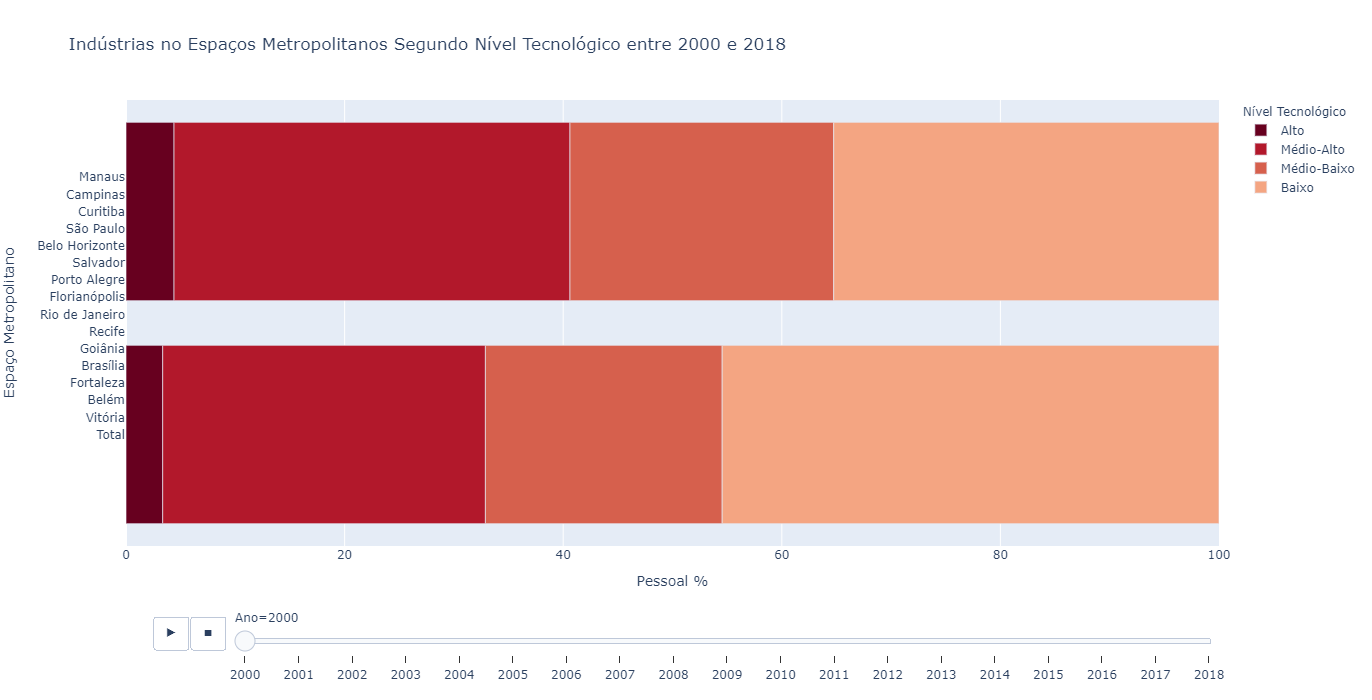

In [5]:
fig, df = ind.ind_tech_level_evolution_dynamic(
    list_years=list(range(2000,2019))
    , list_ufs=['AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MG','PA','PE','PR','RJ','RS','SC', 'SP']
    , list_tec_level=None
    , range_x=100
    , relative = True
    , focus='Médio-Alto'
)
fig.show()

**Tabela 2 - Evolução do Nível Tecnológico das Indústrias nos Espaços Metropolitanos Brasileiros entre 2007 e 2017**

In [17]:
df_evolution = ind.ind_tech_level_evolution_table(list_years=list(range(2000,2019)), total=False, save_feather=True)
df_evolution

2000   2001  \
Espaço Metropolitano                    Nível Tecnológico                      
Arranjo Populacional de Londrina/PR     High-technology           424    474   
                                        Medium-high-technology   4900   4688   
                                        Medium-low-technology    5370   5255   
                                        Low-technology          14629  14380   
Arranjo Populacional de Maringá/PR      High-technology           305    430   
                                        Medium-high-technology   2390   2714   
                                        Medium-low-technology    2596   3262   
                                        Low-technology          14648  15203   
Arranjo Populacional de Ponta Grossa/PR High-technology             7      7   
                                        Medium-high-technology   2026   1971   
                                        Medium-low-technology    1758   1755   
                                        Low-technology           9238  10075   
Curitiba                                High-technology          5175   4388   
                                        Medium-high-technology  42667  42655   
                                        Medium-low-technology   28419  29305   
                                        Low-technology          41519  42023   

                                                                 2002   2003  \
Espaço Metropolitano                    Nível Tecnológico                      
Arranjo Populacional de Londrina/PR     High-technology           529    596   
                                        Medium-high-technology   5050   3944   
                                        Medium-low-technology    6114   6700   
                                        Low-technology          16173  16317   
Arranjo Populacional de Maringá/PR      High-technology           628    330   
                                        Medium-high-technology   2929   3017   
                                        Medium-low-technology    3486   3611   
                                        Low-technology          17199  18349   
Arranjo Populacional de Ponta Grossa/PR High-technology            10     10   
                                        Medium-high-technology   1959   1700   
                                        Medium-low-technology    1781   2016   
                                        Low-technology          10715  11948   
Curitiba                                High-technology          4368   4758   
                                        Medium-high-technology  44821  44439   
                                        Medium-low-technology   29838  32065   
                                        Low-technology          44934  45726   

                                                                 2004   2005  \
Espaço Metropolitano                    Nível Tecnológico                      
Arranjo Populacional de Londrina/PR     High-technology           918    953   
                                        Medium-high-technology   4544   4977   
                                        Medium-low-technology    6934   6809   
                                        Low-technology          17619  19170   
Arranjo Populacional de Maringá/PR      High-technology           556    672   
                                        Medium-high-technology   3624   3681   
                                        Medium-low-technology    4192   4075   
                                        Low-technology          19461  19720   
Arranjo Populacional de Ponta Grossa/PR High-technology             9      6   
                                        Medium-high-technology   1869   1553   
                                        Medium-low-technology    2719   2970   
                                        Low-technology          13041  12675   
Curitiba                                High-technology        

In [25]:
df_evolution = df_evolution.melt(ignore_index=False, var_name='Ano', value_name='Pessoal').reset_index().sort_values(by=['Espaço Metropolitano', 'Ano', 'Nível Tecnológico'])

In [39]:
df_evolution['Nível Tecnológico'] = df_evolution['Nível Tecnológico'].map({'High-technology':'Alto', 'Medium-high-technology':'Médio-Alto', 'Medium-low-technology':'Médio-Baixo', 'Low-technology':'Baixo'}).astype(dc.type_cat_ind_tec_PT)

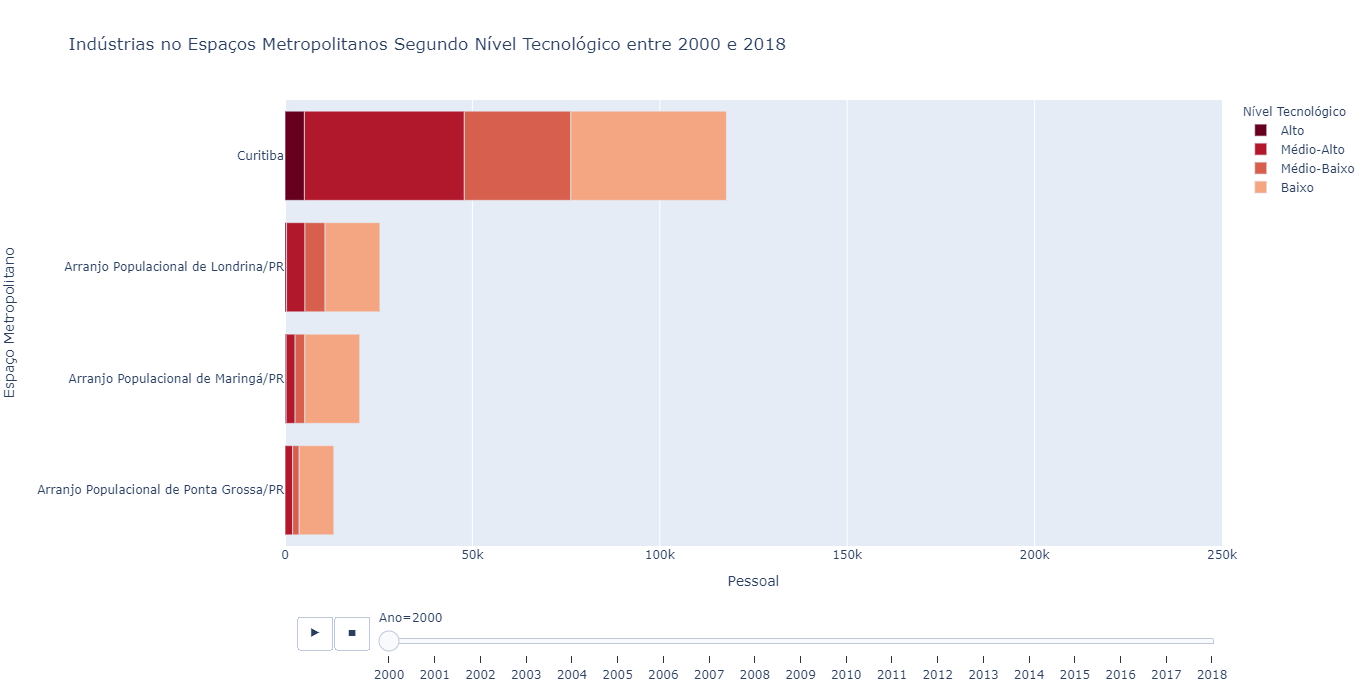

In [43]:
fig = px.bar(
    data_frame=df_evolution
    , x=df.columns[-1]
    , y='Espaço Metropolitano' 
    , color='Nível Tecnológico'
    , animation_frame='Ano'
    , orientation='h'
    , category_orders={'Espaço Metropolitano': ['Curitiba', 'Arranjo Populacional de Londrina/PR', 'Arranjo Populacional de Maringá/PR', 'Arranjo Populacional de Ponta Grossa/PR']}
    , color_discrete_map={
        'Alto':'rgb(103,0,31)'
        , 'Médio-Alto':'rgb(178,24,43)'
        , 'Médio-Baixo':'rgb(214,96,77)'
        , 'Baixo':'rgb(244,165,130)'}
    , height=700
    , title=f'Indústrias no Espaços Metropolitanos Segundo Nível Tecnológico entre 2000 e 2018'
    , range_x=(0,250_000)
    , barmode='relative'
)

fig.update_layout(yaxis={'categoryorder':"sum ascending"})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000  

fig.show()

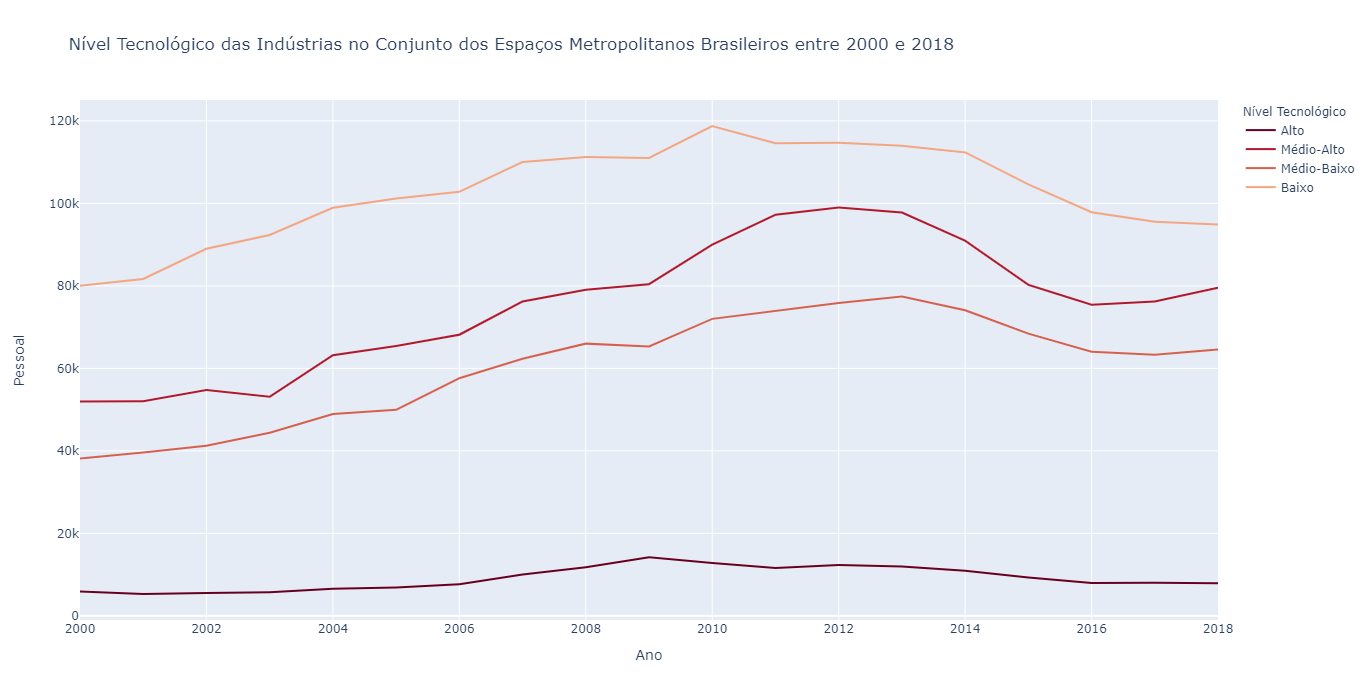

In [8]:
fig = ind.ind_tech_level_evolution_line_plot(
    list_met=['Total']
    , title='Nível Tecnológico das Indústrias no Conjunto dos Espaços Metropolitanos Brasileiros entre 2000 e 2018'
)
fig.show()